## Import Libraries

All libraries required for Exploratory Data Analysis are imported.  

In [4]:
## Pickle allows Python objects to be saved for later use, and retrieved
import pickle

## Pandas required to manipulate data into user-friendly data structure
import pandas as pd

## Numpy is used to execute various mathematical functions
import numpy as np

## Matplotlib and Seaborn are both plotting tools used to support datavisualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## An sklearn function used to convert a collection of text documents into a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer

import plotly.express as px

## Set Display Options

Display settings for matplotlib/seaborn charts are set in advance.  

In [5]:
## Define color palette
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'
CB91_BlueD = '#016794'
CB91_GreenD = '#187970'
CB91_PinkD = '#B317B1'
CB91_PurpleD = '#4E1762'
CB91_VioletD = '#330E4C'
CB91_AmberD = '#985E09'
CB91_BlueL = '#D5F2FF'
CB91_GreenL = '#DAF8F5'
CB91_PinkL = '#FDECFC'
CB91_PurpleL = '#9D2EC5'
CB91_VioletL = '#ECD4F5'
CB91_AmberL = '#E2C8F4'

## A list that we’ll use to cycle through colors in charts
color_list = [CB91_Blue, CB91_Green, CB91_Amber, CB91_Pink, CB91_Violet, CB91_BlueD,
             CB91_GreenD, CB91_Purple, CB91_BlueL, CB91_GreenL, CB91_AmberL,
             CB91_PinkL, CB91_VioletL, CB91_AmberD, CB91_PinkD, CB91_VioletD]

## Use seaborn to set all the default chart visual settings
sns.set(font='DejaVu Sans',
       rc={'axes.axisbelow': False,
           'axes.edgecolor': 'lightgrey',
           'axes.facecolor': 'white',
           'axes.grid': False,
           'axes.labelcolor': 'dimgrey',
           'axes.spines.right': False,
           'axes.spines.top': False,
           'figure.facecolor': 'white',
           'lines.solid_capstyle': 'round',
           'patch.edgecolor': 'w',
           'patch.force_edgecolor': True,
           'text.color': 'dimgrey',
           'xtick.bottom': False,
           'xtick.color': 'dimgrey',
           'xtick.direction': 'out',
           'xtick.top': False,
           'ytick.color': 'dimgrey',
           'ytick.direction': 'out',
           'ytick.left': False,
           'ytick.right': False})

sns.set_context('paper', rc={'font.size':16,'axes.titlesize':19,'axes.labelsize':16})
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)



## Load Dataframe

The data that will be explored during this section has been stored, using pickle, in a dataframe called 'cleaned_labelled_tweets'.  This dataframe was compiled from data extracted from the Twitter API (see **Step 1 - Obtain Data**), manually labelled and then cleaned (see **Step 2 - Scrub Data**).  

Pickle can therefore be used to load the stored dataframe.

In [6]:
## Import saved dataframe using pickle
df = pd.read_pickle('cleaned_labelled_tweets')

In [7]:
## Reset the index (and drop the previous index)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

Once loaded, the dataframe can be previewed using **df.head()**.

In [8]:
## Display the first five records
df.head()

,network,datetime,original_tweet,subject,sentiment,lemmatized_tweets_tokens,lemmatized_tweets_string
0,@VodafoneUK,2019-12-04 08:05:14,@VodafoneUK Plus £2.28 package &amp; posting !...,device,0.000000,"[plus, 2.28, package, posting]",plus 2.28 package posting
1,@VodafoneUK,2019-12-04 08:04:05,I have repeatedly asked how to get a refund so...,customer service,-0.300000,"[repeatedly, asked, get, refund, use, another,...",repeatedly asked get refund use another provid...
2,@VodafoneUK,2019-12-04 08:01:19,"I have supplied visa details twice, I have bee...",customer service,-0.300000,"[supplied, visa, detail, twice, subjected, hor...",supplied visa detail twice subjected horrendou...
3,@VodafoneUK,2019-12-04 07:57:42,@VodafoneIN promised yesterday I’d receive no ...,customer service,-0.250000,"[promised, yesterday, id, receive, call, would...",promised yesterday id receive call would get e...
4,@VodafoneUK,2019-12-04 07:57:16,@VodafoneUK you send texts about rewards - thi...,promotion,-0.155556,"[send, text, reward, morning, lindt, take, app...",send text reward morning lindt take app never ...


As can be seen from the above, tweets are stored in various forms (original, lemmatized as tokens and lemmatized as strings).  They are categorised by network (e.g. Vodafone, EE etc.) and subject.  Each tweet has also been given a sentiment rating.  

## Distribution of Tweets by Network

As a starting point, it makes sense to review the number of tweets by network.  Ideally these will be reasonably equally distributed across networks.

Text(0.5, 1.0, 'Number of Tweets by Network')

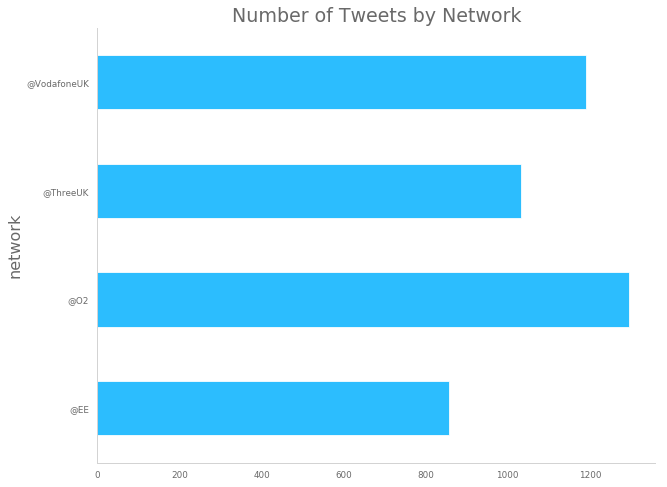

In [9]:
## Use the groupby function to calculate the number of reviews by network.  Plot these on a horizontal barchart.
df.groupby(['network']).count()['subject'].plot(kind='barh', figsize=(10,8))
plt.title('Number of Tweets by Network')

## Distribution of Sentiment by Network

Each tweet has been assigned a sentiment rating by TextBlob (see **Step 2 - Scrub Data**).  This sentiment rating ranges from -1 (very negative) to 0 (neutral) to +1 (very positive).  To understand whether there is any notable difference between the sentiment of people tweeting about each network, a distribution plot is constructed.

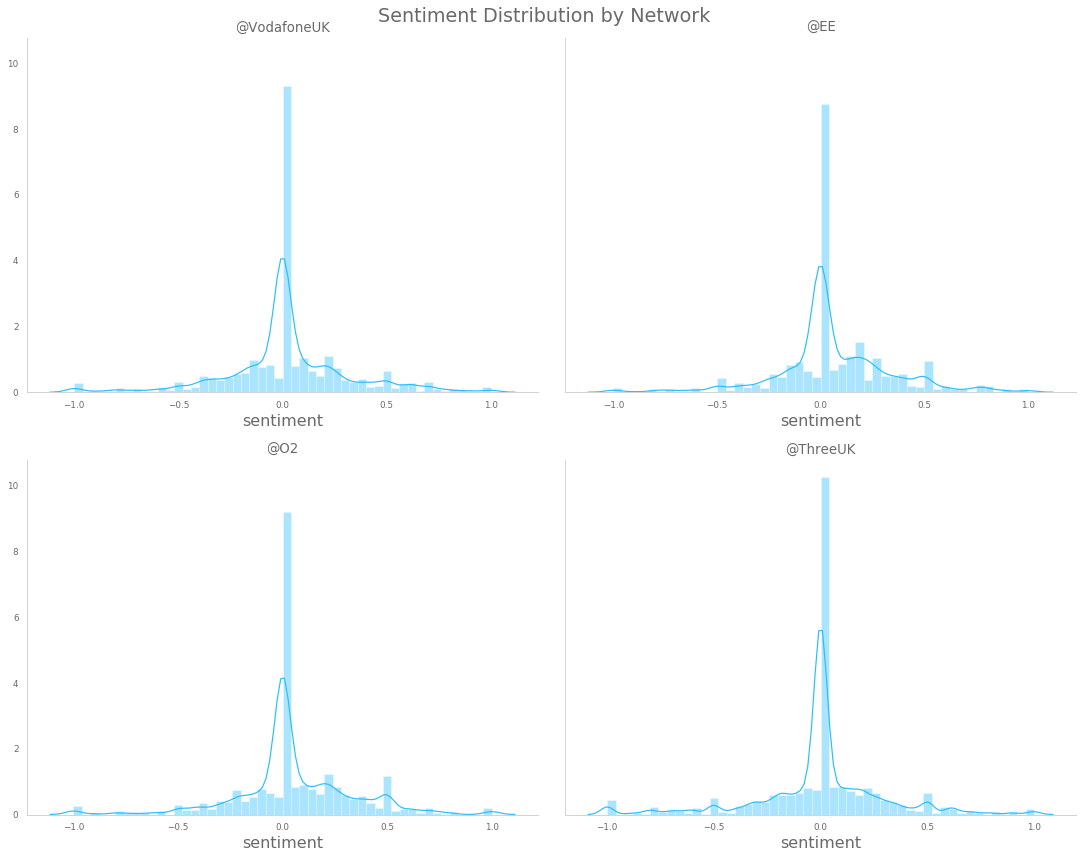

In [10]:
## Create figure with 4 sets of axes and a shared y axis
fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15,12),sharey=True, constrained_layout='True')

## For loop runs through each network and created a sentiment distplot 
for key, val in enumerate(['@VodafoneUK','@EE','@O2','@ThreeUK']):
    
    ## Used to define the axis on which the distplot will appear
    i = key//2
    j = key%2

    ## Plots the distribution plot for the given network on the specified axes
    sns.distplot(df[df['network']==val]['sentiment'], label=val, ax=axes[i][j])
    ## Sets the title for the subplot
    axes[i][j].set_title(val, fontdict={'fontsize':'small'})

## Provides an overarching title for the figure
fig.suptitle('Sentiment Distribution by Network', va='top')
plt.show()

## Distribution of Tweet Subject by Network

Next, the distribution of tweets by subject is scrutinised.  For this task, a radial plot is chosen.  The plotly library is best suited to this task.

In [113]:
## Group data by the number of tweets per subject and network
subject_df = df.groupby(['subject','network'], as_index=False).count()

## Use plotly to create a raidal (polar) plot 
fig = px.line_polar(subject_df, theta='subject', r='datetime', color='network')

## Add a title to the plot
fig.update_layout(title={'text':'Number of Tweets by Subject & Network', 
                         'x':0.4,'xanchor':'center'})
fig.show()

The chart above illustrates the following:

- Vodafone appears to have the most tweets relating to customer service.  
- Network issues are most prevalent with O2 (followed by Three)
- The biggest number of tweets are classified as Other.  This may suggest that a finer degree of categorisation is required.

Given that the number of tweets available per network is not equal, it makes sense to also consider the proportion of tweets per subject (not just the absolute number). Again, this is done using Plotly.

In [103]:
## Create an empty dataframe
subject_df = pd.DataFrame(columns=['network','subject'])

## Run a for loop that iterates through each network
for network in ['@VodafoneUK','@EE','@O2','@ThreeUK']:
    
    ## Create a temporary dataframe to contain the proportion of tweets per subject by network
    temporary_df = pd.DataFrame(df.loc[df['network']==network]['subject'].value_counts(normalize=True))
    temporary_df['network'] = network
    
    ## Append the temporary dataframe to the main dataframe
    subject_df = pd.concat([subject_df, temporary_df], axis=0, sort=False)

## Reset the index and rename the columns to provide greater explainability
subject_df.reset_index(inplace=True)

subject_df.rename(columns={'index':'subject','network':'network',
                           'subject':'proportion of tweets'},inplace=True)


In [112]:
## Use plotly to create the polar plot
fig = px.scatter_polar(subject_df, theta='subject', r='proportion of tweets', color='network')

## Add a title to the plot
fig.update_layout(title={'text':'Proportion of Tweets by Subject & Network', 
                         'x':0.4,'xanchor':'center'})
fig.show()

For clarity, a scatter polar plot is used above.  What is clear is that Vodafone continues to have the biggest proportion of tweets relating to customer service.  Meanwhile O2 and Three have a similar proportion of tweets relating to network issues.

## Top 20 Words: Unigrams

In [42]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

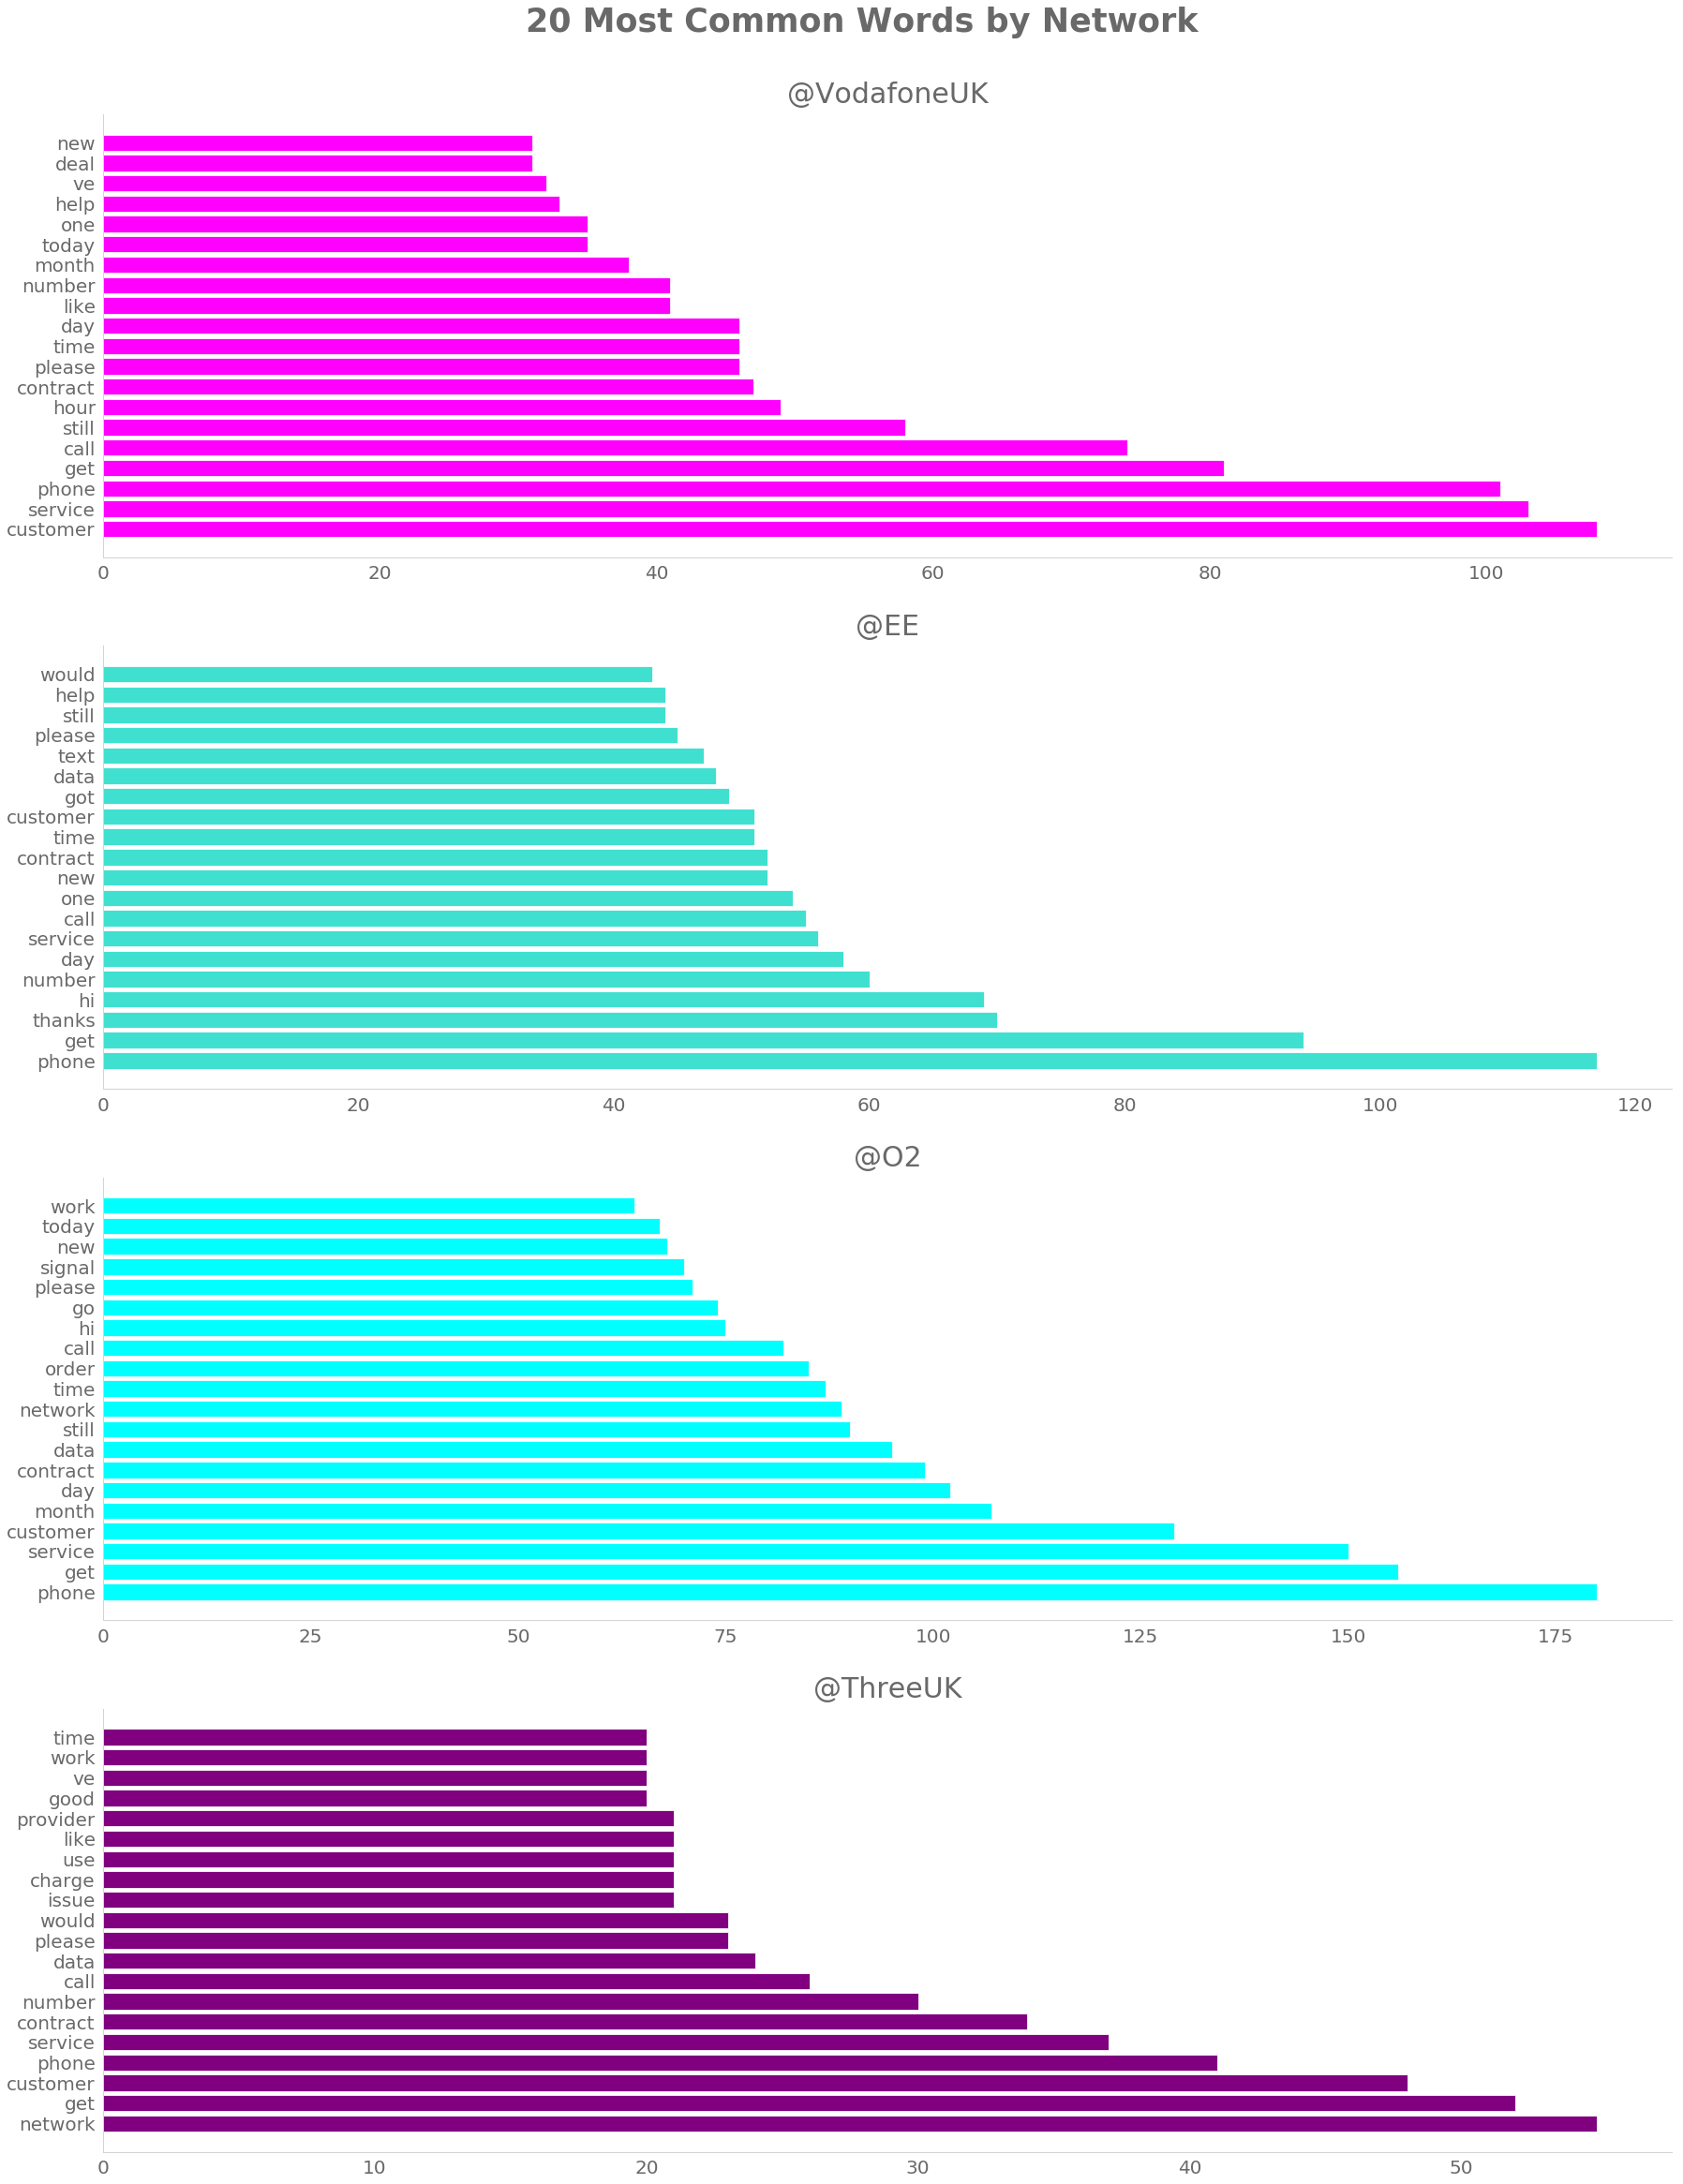

In [82]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

colours = ['magenta','turquoise','cyan','purple']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,40))
fig.suptitle('20 Most Common Words by Network', fontsize=35, y=0.92, fontweight='bold')


for key, val in enumerate(['@VodafoneUK','@EE','@O2','@ThreeUK']):
    
    top_words = get_top_n_words(df['lemmatized_tweets_string'].loc[df['network']==val], n=20)
    top_words_df = pd.DataFrame(top_words, columns=['Word','Frequency'])
    axes[key].barh(top_words_df['Word'], top_words_df['Frequency'], color=colours[key])
    axes[key].set_title(val, fontsize=30, fontdict={'verticalalignment':'bottom'})

plt.show()

## Top 20 Words: Bigrams

In [83]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

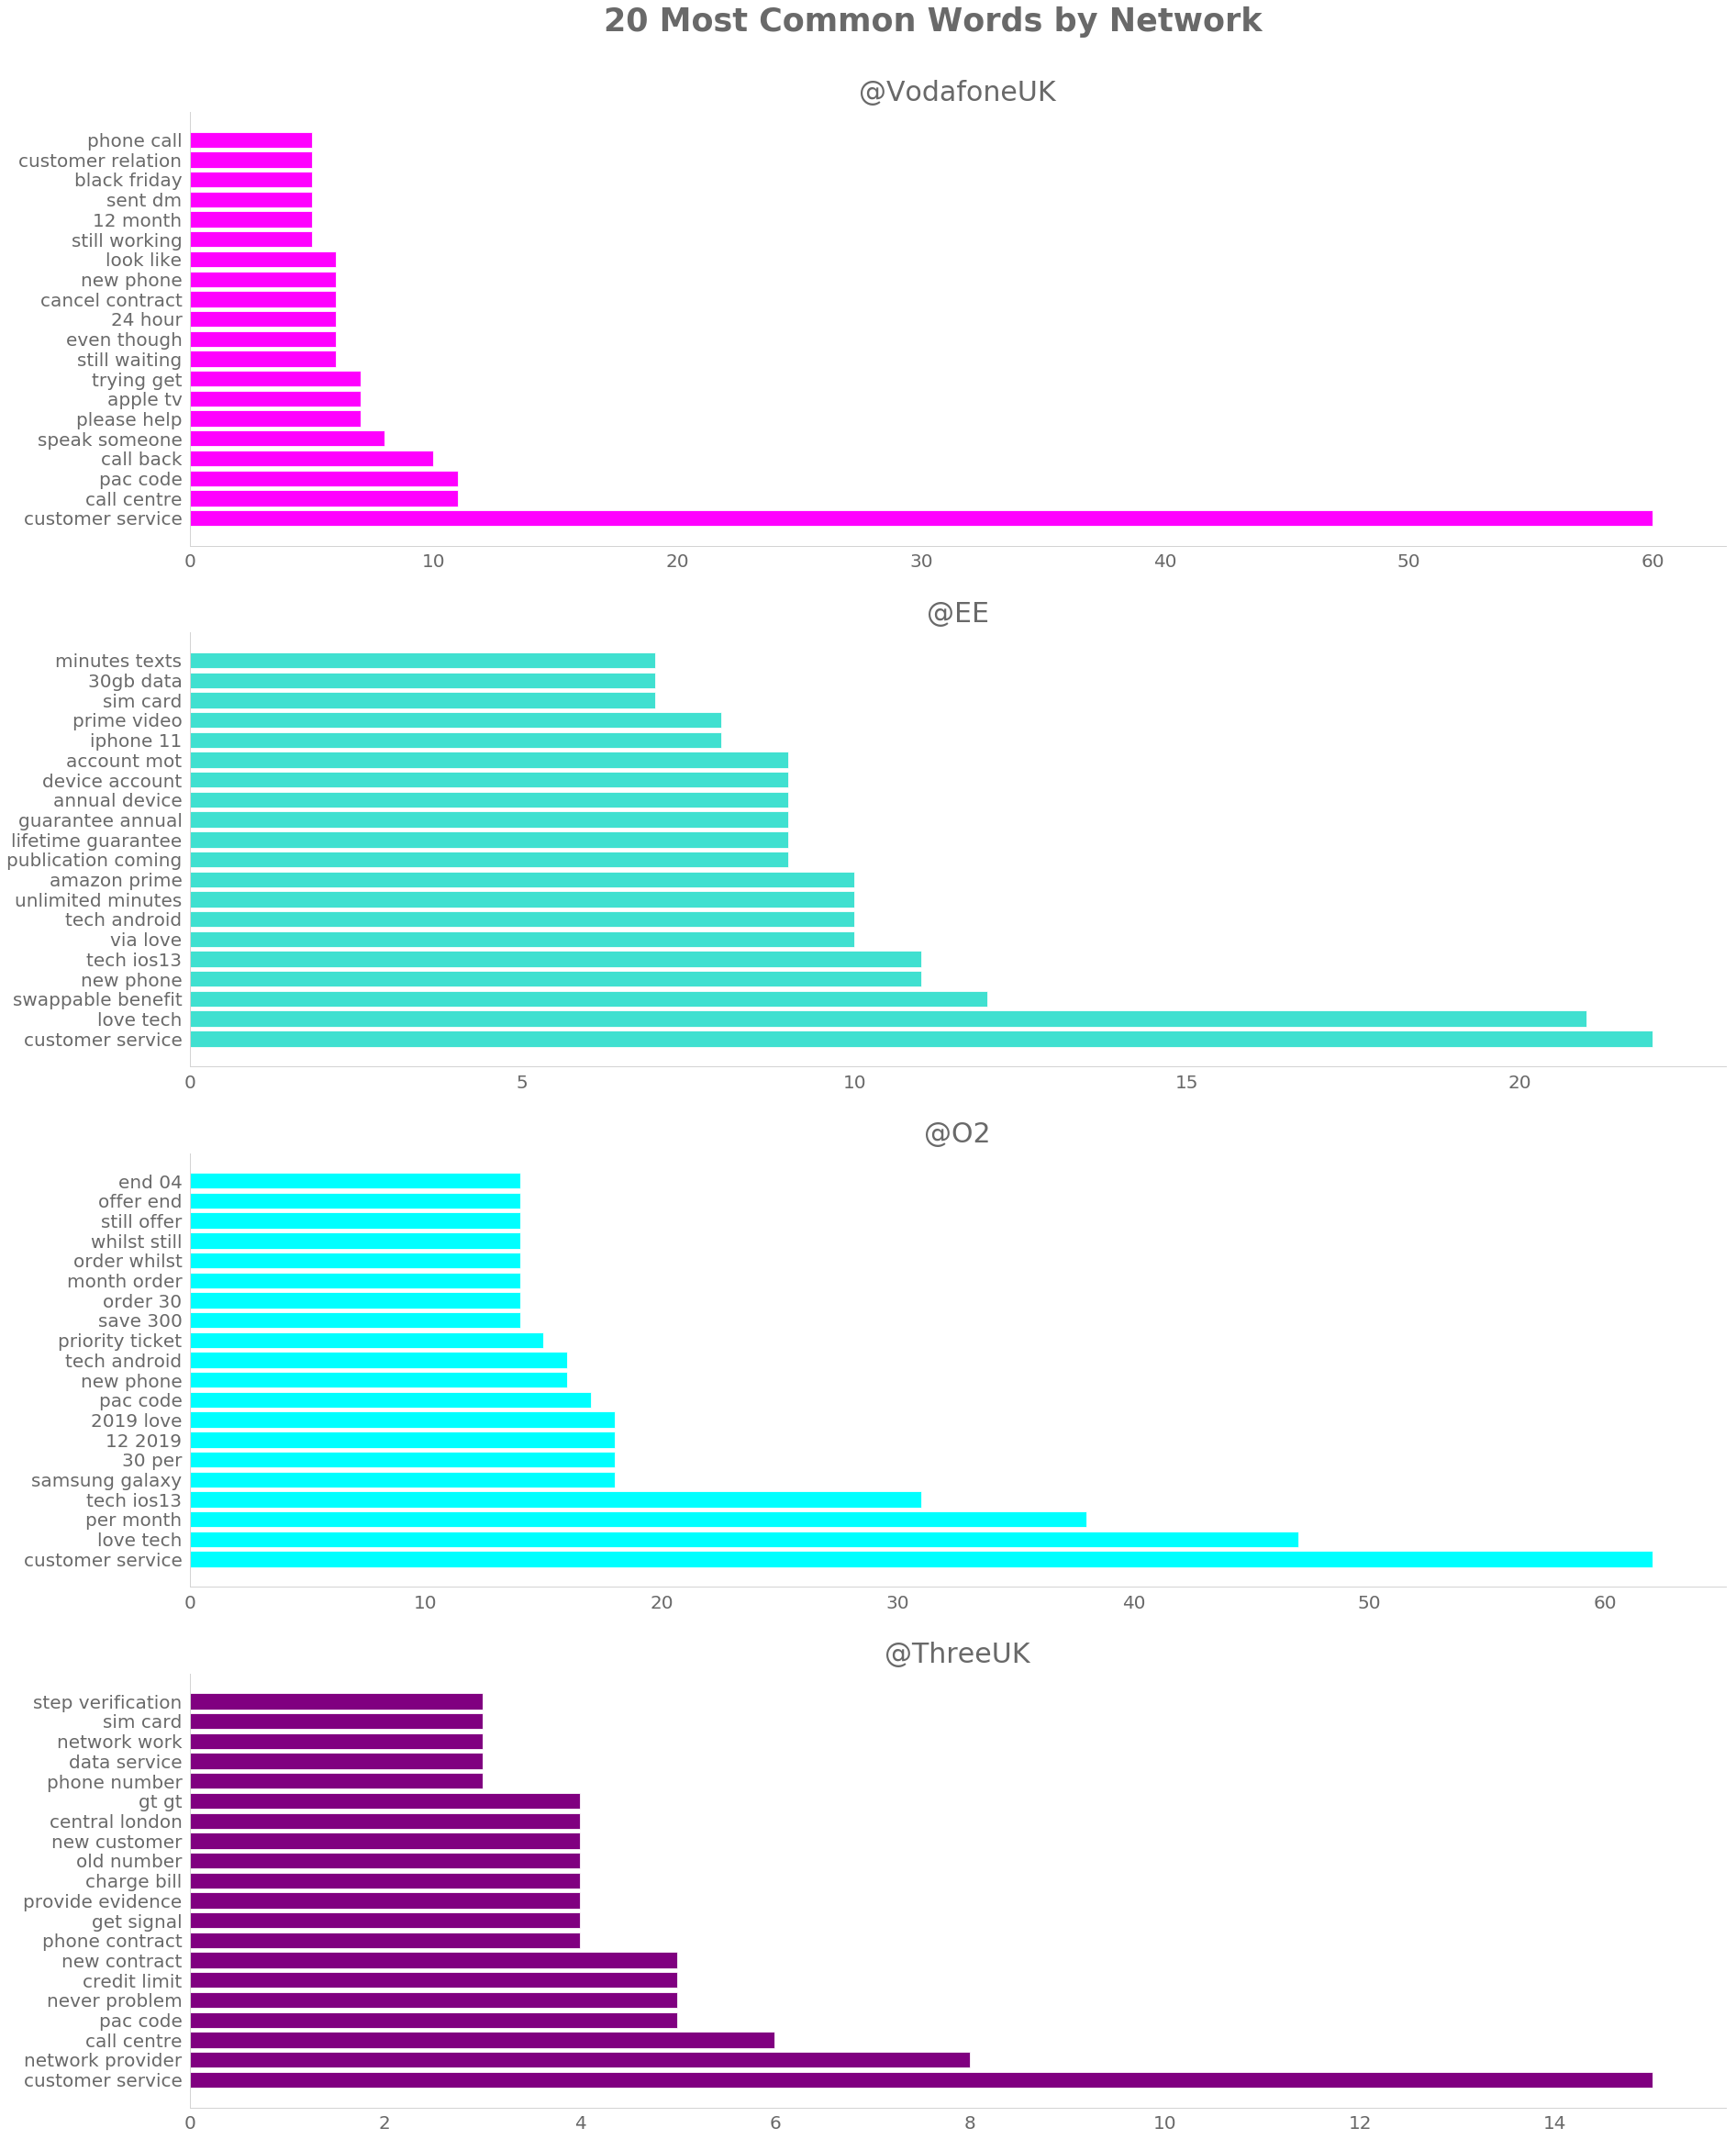

In [84]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

colours = ['magenta','turquoise','cyan','purple']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,40))
fig.suptitle('20 Most Common Words by Network', fontsize=35, y=0.92, fontweight='bold')


for key, val in enumerate(['@VodafoneUK','@EE','@O2','@ThreeUK']):
    
    top_words = get_top_n_bigram(df['lemmatized_tweets_string'].loc[df['network']==val], n=20)
    top_words_df = pd.DataFrame(top_words, columns=['Word','Frequency'])
    axes[key].barh(top_words_df['Word'], top_words_df['Frequency'], color=colours[key])
    axes[key].set_title(val, fontsize=30, fontdict={'verticalalignment':'bottom'})

plt.show()

## Top 20 Words: Trigrams

In [25]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

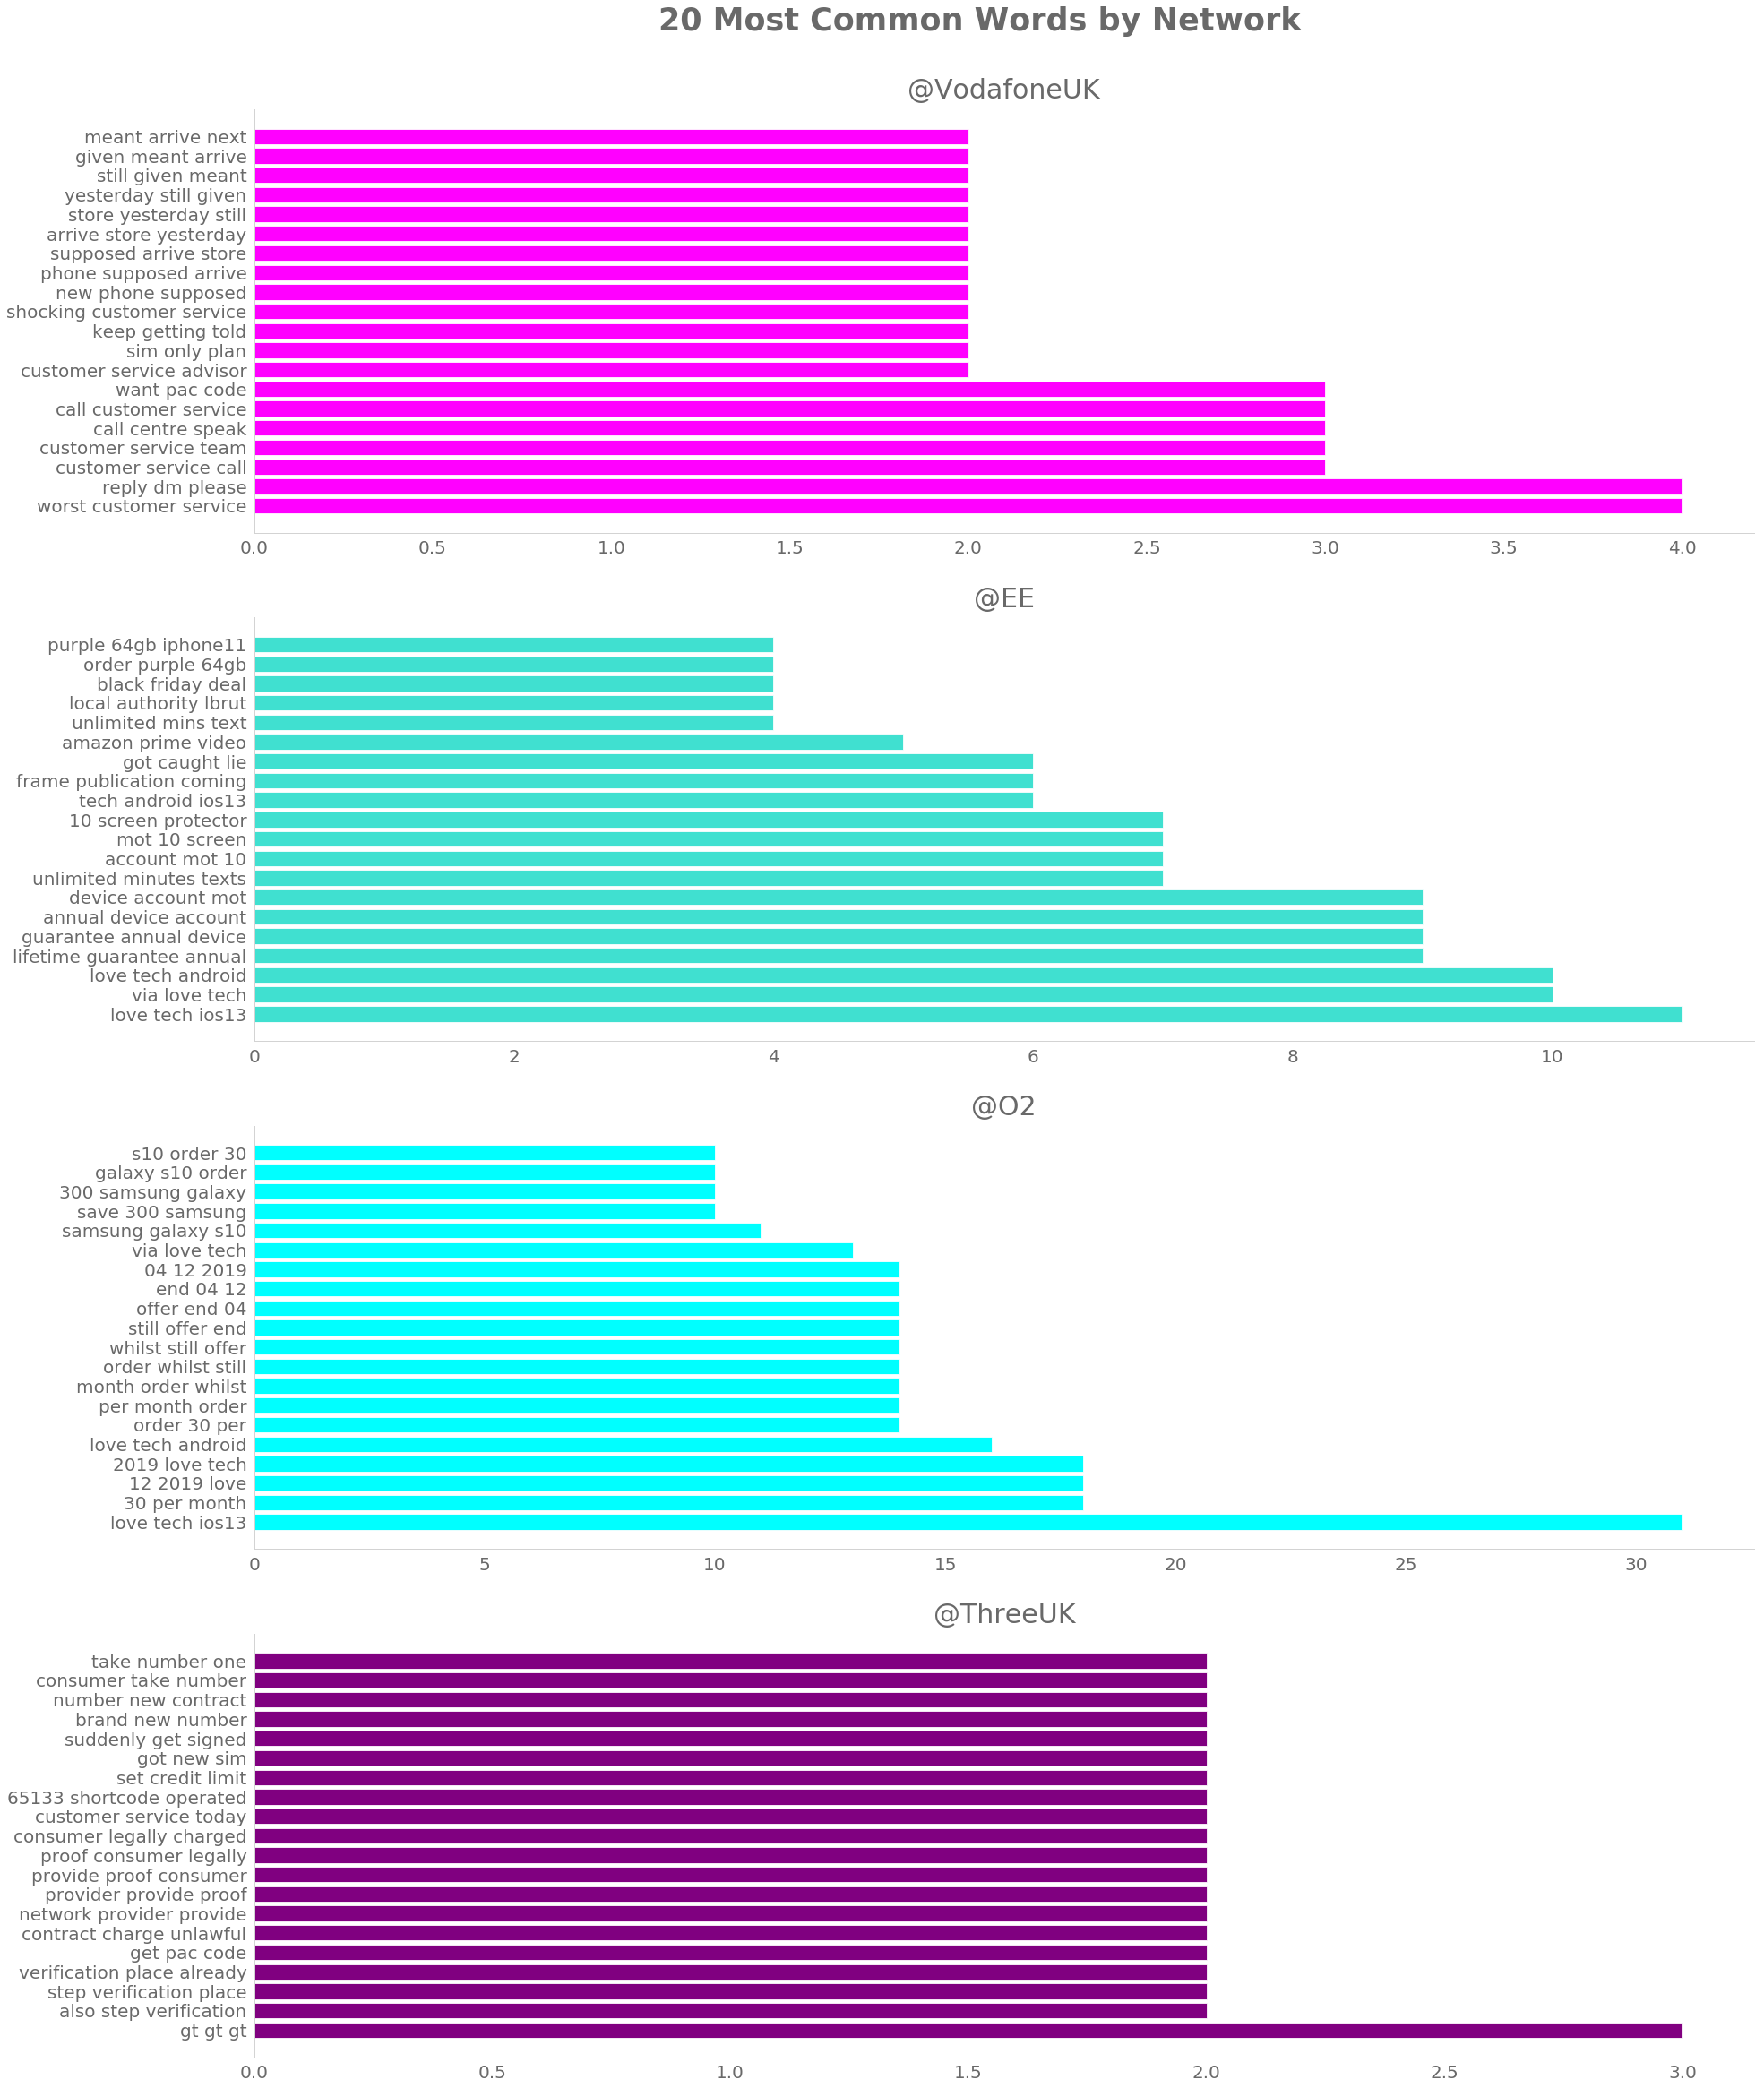

In [85]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)

colours = ['magenta','turquoise','cyan','purple']

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(30,40))
fig.suptitle('20 Most Common Words by Network', fontsize=35, y=0.92, fontweight='bold')


for key, val in enumerate(['@VodafoneUK','@EE','@O2','@ThreeUK']):
    
    top_words = get_top_n_trigram(df['lemmatized_tweets_string'].loc[df['network']==val], n=20)
    top_words_df = pd.DataFrame(top_words, columns=['Word','Frequency'])
    axes[key].barh(top_words_df['Word'], top_words_df['Frequency'], color=colours[key])
    axes[key].set_title(val, fontsize=30, fontdict={'verticalalignment':'bottom'})

plt.show()